# Predicting Survival On the Titanic
### Machine Learning Final Project
#### Cloe Kwiatkowski

# !['titanicpic'](titanic.webp)

### Objective: 
    Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

Build the most accurate model for predicting which passengers would survive the sinking of the Titanic. Aim to identify how best to optimize supervised learning problems. Data scientists are tasked with finding the best possible algorithm and furthermore optimizing its hyper-parameters.

Download the dataset:
https://www.kaggle.com/c/titanic/data

In [5]:
# imports
import pandas as pd
import numpy as np

### Importing *Titanic.csv* Dataset

In [6]:
# importing titanic.csv
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In [7]:
# imports
from sklearn.impute import SimpleImputer

In [8]:
# converting 'Sex' into a numeric data type
titanic.loc[titanic['Sex']=='male', 'Gender'] = 1  # male = 1
titanic.loc[titanic['Sex']=='female', 'Gender'] = 0  # female = 0


# converting 'Embarked' into a numeric data type - S, C, Q
titanic.loc[titanic['Embarked']=='S', 'Embark'] = 0
titanic.loc[titanic['Embarked']=='C', 'Embark'] = 1
titanic.loc[titanic['Embarked']=='Q', 'Embark'] = 2

# 'Embarked' column - instantiating a SimpleImputer to identify NaN values and impute as the mean
imp_E_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit the imputer and transform the data
titanic['Embark'] = imp_E_mean.fit_transform(titanic[['Embark']])


# 'Age' column - instantiating a SimpleImputer to identify NaN values and impute as the mean age
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit the imputer and transform the data
titanic['Age'] = imp_mean.fit_transform(titanic[['Age']])

### Splitting the Data: Target Vector and Features of Interest

In [9]:
# target vector (dependent variable)
y = titanic['Survived']  # 1 == survived; 0 == deceased

# removing unwanted columns/features from training dataset and renaming new df as X (features of interest/independent variable)
X = titanic.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'Sex', 'Survived', 'Embarked'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embark
0,3,22.0,1,0,7.2500,1.0,0.0
1,1,38.0,1,0,71.2833,0.0,1.0
2,3,26.0,0,0,7.9250,0.0,0.0
3,1,35.0,1,0,53.1000,0.0,0.0
4,3,35.0,0,0,8.0500,1.0,0.0


In [10]:
# checking for NaNs in X df
X.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
Embark    0
dtype: int64

### Splitting the Data: Training, Validation, and Test Sets

In [11]:
# imports
from sklearn.model_selection import train_test_split

In [12]:
# train/test split 1 - splitting the data into a training/validation dataset & test dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# train/test split 2 - splitting the training/validation dataset into a training & validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.333, random_state=42)

## Logistic Regression Model: Baseline Model

In [13]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
# building a pipeline that will impute and standardize the data and fit a logistic regression model
logistic_regression = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),  # identifying NaN values and imputes them with the mean
    ('scaler', StandardScaler()),  # standardizing the data; mean==0, std==1
    ('log_reg', LogisticRegression(random_state=0))  # selecting the logistic regression model; C=1 is default
])
# fit the pipeline
logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

### Logistic Regression Baseline Model Metrics

In [15]:
# imports
from sklearn.metrics import precision_score, recall_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Calculating Training Accuracy

In [16]:
# calculating training accuracy
log_reg_train_acc = logistic_regression.score(X_train, y_train)

Cross-Validation of Model

In [17]:
# cross-validation of model using default number of splits/folds
logistic_regression_cv = cross_val_score(logistic_regression, X_train, y_train)
# cross-validation mean
log_reg_cv_mean = logistic_regression_cv.mean()
# cross-validation scores standard deviation
log_reg_cv_std = logistic_regression_cv.std()

Calculating the Confusion Matrix

In [18]:
# calculating predicted y values from X_train
classes = pd.DataFrame(logistic_regression.predict(X_train))  # predicting class
probs = pd.DataFrame(logistic_regression.predict_proba(X_train))  # class probability


# calculating precision and recall
precision = precision_score(y_train, classes)  # calculating how well a classifier predicts the correct class
recall = recall_score(y_train, classes)  # calculating how well the model can correctly predict the correct class out of the actual correct class


# computing the confusion matrix
conf_matrix = confusion_matrix(y_train, classes)
# confusion_matrix_classification = [[classified correctly as deceased], [classified incorrectly as deceased], [classified incorrectly as survived], [classified correctly as survived]]

Generating the Receiver Operating Characteristic (ROC) Curve

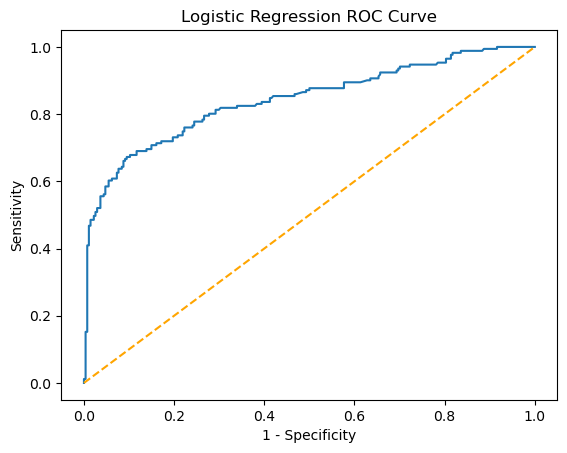

In [19]:
# generating data for the ROC curve
fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])

# tp is the number of TRUE positives
# tpr is the true positive rate
tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

# fp is the number of FALSE positives
# fpr is the false positive rate
fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)


thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

# plotting the ROC curve
roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)
plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Logistic Regression ROC Curve')
plt.show()

# calculating the area under the ROC curve - the higher the auc, the better the model is at distinguishing between classes
log_auc = auc(fpr_, tpr_)

In [20]:
# printing model metrics
print('Logistic Regression Model training accuracy is', log_reg_train_acc)
print('Logistic Regression Cross-Validation Mean is', log_reg_cv_mean)
print('Logistic Regression Cross-Validation Standard Deviation is', log_reg_cv_std)
print('Logistic Regression Precision Score is', precision)
print('Logistic Regression Recall Score is', recall)
print('Logistic Regression Confusion Matrix is', conf_matrix)
print('Area Under the Logistic Regression ROC Curve is', log_auc)

Logistic Regression Model training accuracy is 0.7955056179775281
Logistic Regression Cross-Validation Mean is 0.7775280898876404
Logistic Regression Cross-Validation Standard Deviation is 0.017977528089887646
Logistic Regression Precision Score is 0.7531645569620253
Logistic Regression Recall Score is 0.695906432748538
Logistic Regression Confusion Matrix is [[235  39]
 [ 52 119]]
Area Under the Logistic Regression ROC Curve is 0.8414649763093867


#### Interpreting the Logistic Regression Model Metrics:

Training Accuracy -
The percentage of correct classifications gives us the model accuracy of 79.55% on the training set which will serve as a baseline accuracy for comparing other models to.

Cross-Validation -
Overfitting is defined as a model's ability to make correct predictions based on the data used to develop the model, but does a poor job of making correct predictions when it encounters any new data. To prevent overfitting, cross-validation is performed. In cross-validation, the validation set is no longer needed and instead the training set is split into smaller data sets using k "folds" to indicate the number of splits desired of the training set. The resulting model is validated using the remaining parts of the data. The measure of performance is calculating the average of the CV scores. The mean CV is 0.7775, which indicates that the accuracy using the cross-validation procedure is 77.75%. This score will provide a baseline cross-validation accuracy score to compare to subsequent models.

Precision & Recall Scores -
Precision, *tp / (tp + fp)*, is the ability of the classifier not to classify a negative as a positive. A low precision score (<0.5) suggests that the classifier has a high number of false positives.
Recall, *tp / (tp + fn)*, is the ability of the classifier to correctly classify all the positive samples. A low recall score (<0.5) suggests that the classifier has a high number of false negatives.
High precision and high recall scores (0.5< and <=1.0) are desirable. The precision and recall scores, 0.753 and 0.696 respectively, are both greater than 0.5 which indicates that this classification model returns a low number of false positives and false negatives.
- tp = number of true positives
- tpr = true positive rate
- fp = number of false positives
- fpr = false positive rate
- fn = number of false negatives

Confusion Matrix -
The calculation of the confusion matrix identifies how many passengers were:
    correctly classified as deceased (235)
    *incorrectly* classified as deceased (39)
    *incorrectly* classified as survived (53)
    correctly classified as survived (119).
354 passengers were classified correctly and 98 passengers were classified incorrectly.

ROC Curve -
The ROC curve gives a visual representation of how well a model fits the data. Models that fit the dataset well will show a "curve" that starts vertically and sharply becomes horizontal. The ROC curve of the logistic regression model is more rounded than a curve calculated with a more optimal model would be.

AUC Score -
The AUC score is the area under the curve and calculates how efficient the model is at distinguishing between the positive and negative classes. An AUC of 1 means the classifier is 100% accurate in distinguishing between all the positive and negative class points. The AUC score for the logistic regression model is 0.841, which is relatively good, but could possibly be increased in subsequent models. This logistic regression model will serve as a classification baseline model of accuracy to determine if we can increase the accuracy of our model.

## Ridge Regression (L2 Penalty) Model
- Ridge regression has an L2 penalty that shrinks the coefficients of unimportant model terms very close to 0, but not actually 0
- Tends to work best where there are many model features that all have some amount of predictive power
- Regularizes the model coefficients, so they are on a smaller scale
- A larger model coefficient (either positive or negative) means that the model coefficient is more strongly associated with the outcome

In [21]:
# building L2 penalty pipeline
ridge_regression = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler_l2', StandardScaler()),
    ('log_reg_l2', LogisticRegression(random_state=0, penalty='l2', solver='liblinear'))  # C=1 is default & optimal C value for model
])
# fit the pipeline
ridge_regression.fit(X_train, y_train)
# cross-validation of model
ridge_regression_cv = cross_val_score(ridge_regression, X_train, y_train)

## Lasso Regression (L1 Penalty) Model
- Lasso regression has an L1 penalty that shrinks the coefficients of unimportant model terms down to exactly 0
- Tends to work best where there are many model features, but only a few have predictive power
- A larger model coefficient (either positive or negative) means that the model coefficient is more strongly associated with the outcome

In [22]:
# building L1 penalty pipeline
lasso_regression = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler_l1', StandardScaler()),
    ('log_reg_l1', LogisticRegression(random_state=0, penalty='l1', solver='liblinear'))
])
# fit the pipeline
lasso_regression.fit(X_train, y_train)
# cross-validation of model
lasso_regression_cv = cross_val_score(lasso_regression, X_train, y_train)

## K-Nearest Neighbor (KNN) Model
- Looks at the k-nearest neighbors to determine the class in which an individual belongs
- Goal is to find the best k value that describes the data without overfitting
- Pros: easy to explain and great for data without too many features
- Cons: can take a long time to run due to the calculation of a lot of norms and doesn't work well for data with many features

In [23]:
# imports
from sklearn.neighbors import KNeighborsClassifier

Minimum error is 0.26905829596412556 at K = 9


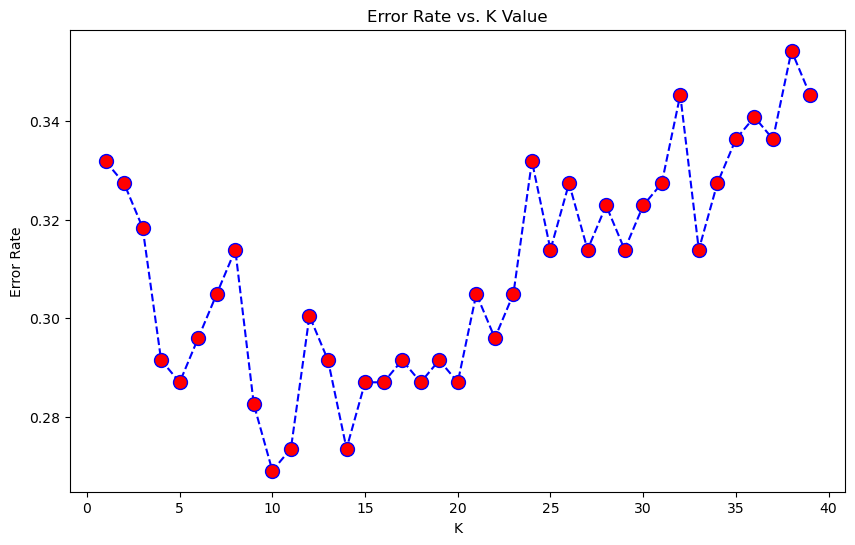

In [24]:
# finding the optimal k value


# creating empty list to append to after each for-loop
error_rate = []

# using a for-loop to loop through k values k=1 to k=39
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)  # looping through the specified range and try k values from 1 to 39 as "i"
    knn.fit(X_train,y_train)  # fitting the training set
    pred_i = knn.predict(X_test)  # predicting the X_test values from the model with different k value each loop
    error_rate.append(np.mean(pred_i != y_test))  # appending the error_rate list

# plotting the different k values
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Minimum error is', min(error_rate), "at K =", error_rate.index(min(error_rate)))  # plotting error rate vs k value to find the k value that produces the lowest error rate

In [25]:
# building a pipeline that will impute and standardize the data and fit at optimal KNN value of k=9
knn = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=9))  # most optimal k value = 9
])
# fit the pipeline
knn.fit(X_train, y_train)
# cross-validation of model
knn_cv = cross_val_score(knn, X_train, y_train)

## Support Vector Machine Algorithm
- The support vector machine (SVM) algorithm defines a boundary line for classification
- An element on one side of the boundary is classified as one thing and an element on the other side is classified as the other
- Support vector is the distance between the closest element of each class to the boundary line
- Margin (hard or soft) is the length of the support vector
- Kernel is the shape of the boundary between classes
    - Polynomial kernel creates a simple polynomial curve for a boundary line
    - Radial basis function kernel creates a "fence" around one class
- Regularization parameter C (default C=1) controls the trade-off between achieving a low training error and being able to generalize your classifier to unseen data
    - Small C: will most likely be generalized to new data, but allows one point in the training set to be misclassified
    - Large C: no points in the training set are misclassified, but the model might not generalize well to new data

In [26]:
# imports
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#### SVM w/ Polynomial Kernel

       C  mean accuracy
0      1      80.883838
1     10      79.308081
2    100      77.964646
3   1000      76.626263
4  10000      76.202020


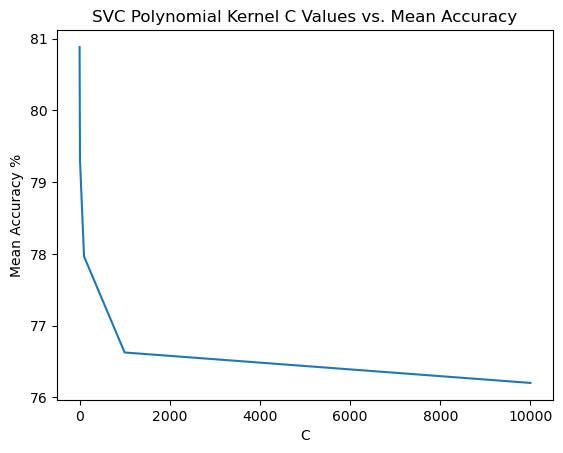

In [27]:
# polynomial kernel - determining optimal C


mean_accuracy_poly = []

for i in [1, 10, 100, 1000, 10000]:
    pipe = Pipeline([
        ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('rbf', SVC(kernel='poly', C=i))
    ])
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=10)
    mean_accuracy_poly.append(scores.mean())

C_df = pd.DataFrame([1, 10, 100, 1000, 10000])
C_df.rename({0:'C'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy_poly)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([C_df, mean_accuracy_df], axis=1)
print(to_plot)


plt.plot(to_plot['C'], to_plot['mean accuracy'])
plt.title('SVC Polynomial Kernel C Values vs. Mean Accuracy')
plt.xlabel('C')
plt.ylabel('Mean Accuracy %')
plt.show()

In [28]:
# building SVM w/ poly kernel pipeline
poly_svm = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='poly', C=1))  # optimal C value
])
# fit the pipeline
poly_svm.fit(X_train, y_train)
# cross-validation of model
poly_svm_cv = cross_val_score(poly_svm, X_train, y_train)

#### SVM w/ Radial Basis Function Kernel

       C  mean accuracy
0      1      82.000000
1     10      80.434343
2    100      79.989899
3   1000      77.515152
4  10000      72.838384


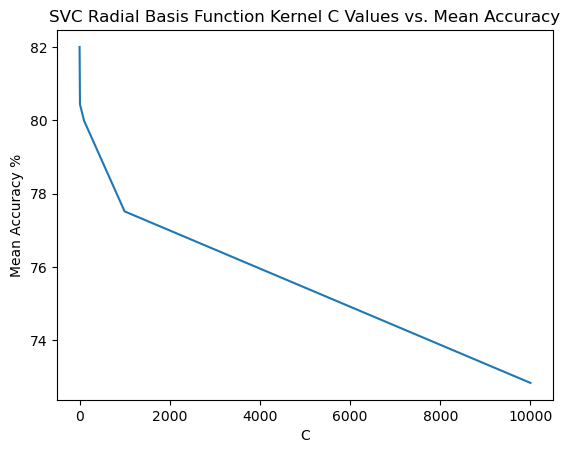

In [29]:
# radial basis function kernel - determining optimal C


mean_accuracy_rbf = []

for i in [1, 10, 100, 1000, 10000]:
    pipe = Pipeline([
        ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('rbf', SVC(kernel='rbf', C=i))
    ])
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=10)
    mean_accuracy_rbf.append(scores.mean())

C_df = pd.DataFrame([1, 10, 100, 1000, 10000])
C_df.rename({0:'C'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy_rbf)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([C_df, mean_accuracy_df], axis=1)
print(to_plot)


plt.plot(to_plot['C'], to_plot['mean accuracy'])
plt.title('SVC Radial Basis Function Kernel C Values vs. Mean Accuracy')
plt.xlabel('C')
plt.ylabel('Mean Accuracy %')
plt.show()

In [30]:
# building SVM w/ radial basis fnc kernel pipeline
rbf_svm = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='rbf', C=1))
])
# fit the pipeline
rbf_svm.fit(X_train, y_train)
# cross-validation of model
rbf_svm_cv = cross_val_score(rbf_svm, X_train, y_train)

## Naive Bayes Classification Models
- Bayesian classification works by looking at all the features for a specific observations and determining the probability than an observation belongs to a certain class
- Naive Bayes means that the algorithm works by looking at each feature independently of all the others
- Types of Bayesian Classifiers:
    - Bernoulli
    - Gaussian

In [31]:
# imports
from sklearn.naive_bayes import BernoulliNB, GaussianNB

#### Bernoulli Naive Bayes Model
- Works best when the features have only yes or no values.

In [32]:
# building a bernoulli NB pipline
bernoulli = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('bernoulli', BernoulliNB())
])
# fit the pipeline
bernoulli.fit(X_train, y_train)
# cross-validation of model
bernoulli_cv = cross_val_score(bernoulli, X_train, y_train)

#### Gaussian Classification
- Works best when the features are on continuous measurements.

In [33]:
# building a gaussian NB pipeline
gaussian = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GNB', GaussianNB())
])
# fit the pipeline
gaussian.fit(X_train, y_train)
# cross-validation of model
gaussian_cv = cross_val_score(gaussian, X_train, y_train)

## Decision Trees
- In a decision tree, each question is called a node and each possible answer is a branch
- In a decision tree algorithm, it finds the feature that provides the largest information gain and splits on that feature; for every branch split, the algorithm finds the next feature that gives the most information gain and splits on that feature; this repeats until it cannot split the branches anymore
- Information gain is defined as the reduction in entropy by transforming a dataset; it is calculated by comparing the entropy of the dataset before and after a transformation
- The criterion is the function to measure the quality of the split and is used to calculate information gain

In [34]:
# imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### Entropy Decision Tree: Measuring Information Gain With Entropy

<Axes: title={'center': 'Decision Tree (Entropy) Feature Importance'}>

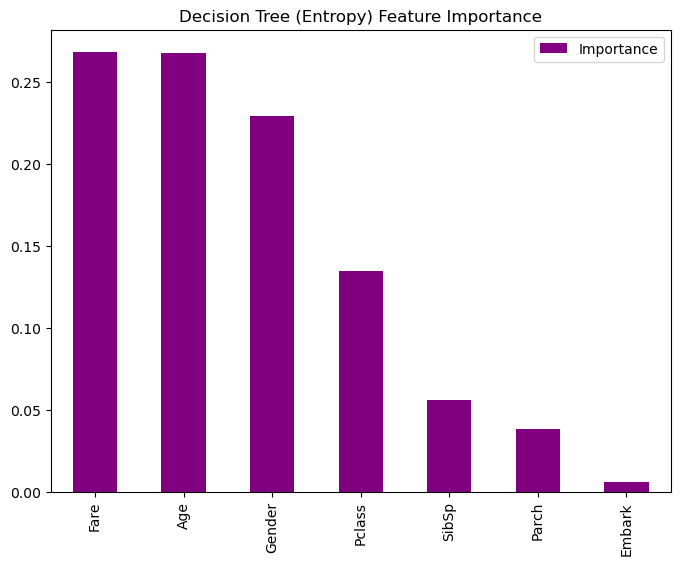

In [35]:
# building a decision tree classifier that splits based on gini index
entropy_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy', random_state=42))
])
# fitting model to the training data
entropy_tree.fit(X_train, y_train)
# cross-validation of model
entropy_tree_cv = cross_val_score(entropy_tree, X_train, y_train)

# calculating feature importance
tree_feat_importances = pd.DataFrame(entropy_tree.named_steps['tree'].feature_importances_, index=X.columns, columns=["Importance"])
tree_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
tree_feat_importances.plot(kind='bar', figsize=(8,6), color='purple', title='Decision Tree (Entropy) Feature Importance')

#### Gini Decision Tree: Measuring Information Gain With Gini Index

In [36]:
# building a decision tree classifier that splits based on gini index
gini_tree = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='gini', random_state=42))
])

# fitting model to the training data
gini_tree.fit(X_train, y_train)
# cross-validation of model
gini_tree_cv = cross_val_score(gini_tree, X_train, y_train)

## Random Forest Classifier Model
- Random forest classifiers fit a number of decision tree classifiers on various sub-samples of the dataset and uses the averages to improve the predictive accuracy of the model and prevent overfitting

In [37]:
# imports
from sklearn.ensemble import RandomForestClassifier

   max_depth  mean accuracy
0          3      81.123596
1          4      81.573034
2          5      82.022472
3          6      83.146067
4          7      82.921348
5          8      82.022472
6          9      81.348315
7         10      82.022472
8         11      81.348315
9         12      80.224719


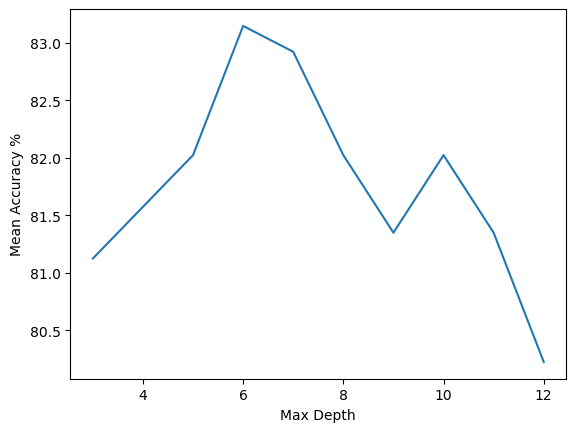

In [38]:
# determine how changing the maximum tree depth changes the model accuracy
mean_accuracy = []

for i in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    pipe = Pipeline([
        ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('tree', RandomForestClassifier(random_state=42, max_depth=i))
    ])
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    mean_accuracy.append(scores.mean())

max_depth_df = pd.DataFrame([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
max_depth_df.rename({0:'max_depth'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([max_depth_df, mean_accuracy_df], axis=1)
print(to_plot)


plt.plot(to_plot['max_depth'], to_plot['mean accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy %')
plt.show()

   max_features  mean accuracy
0             3      82.691919
1             4      82.237374
2             5      82.904040
3             6      82.904040
4             7      83.121212
5             8      83.121212
6             9      83.121212
7            10      83.121212


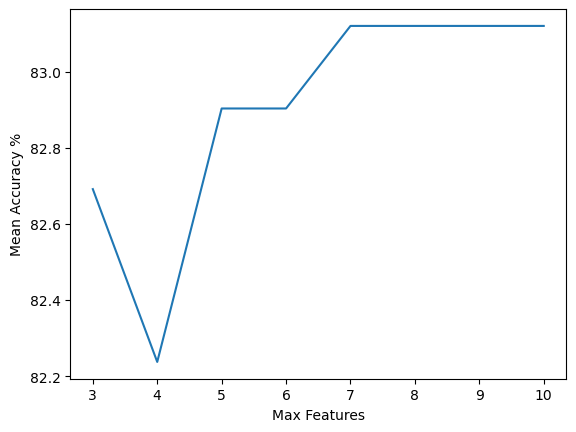

In [39]:
# determine how changing the maximum number of features changes the model accuracy
mean_accuracy = []

for i in [3, 4, 5, 6, 7, 8, 9, 10]:
    pipe = Pipeline([
        ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('tree', RandomForestClassifier(random_state=42, max_depth=6, max_features=i))
    ])
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=10)
    mean_accuracy.append(scores.mean())

max_features_df = pd.DataFrame([3, 4, 5, 6, 7, 8, 9, 10])
max_features_df.rename({0:'max_features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([max_features_df, mean_accuracy_df], axis=1)
print(to_plot)


plt.plot(to_plot['max_features'], to_plot['mean accuracy'])
plt.xlabel('Max Features')
plt.ylabel('Mean Accuracy %')
plt.show()

In [40]:
# building a random forest classifier pipeline w/ max_depth=6 & max_features=8
rfc = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', RandomForestClassifier(random_state=42, max_depth=6, max_features=7))  # using the optimal max_features=8
])
# fit the pipeline
rfc.fit(X_train, y_train)
# cross-validation of model
rfc_cv = cross_val_score(rfc, X_train, y_train)

## Boosting
- In boosting decision trees, the decision trees are modeled in sequence
- Data that was misclassified in the previous tree is purposefully selected to be included in the sample for developing the subsequent tree
- Learning rate is a hyperparameter that determines how much each new tree "learns" from the previous tree; smaller values tend to produce a better fitting model, but require more compute time
    - AdaBoost - a learning rate around 1 (the default) tends to be most effective
    - GradientBoost - a learning rate between 0.1 and 0.3 tends to work best (0.1 is the default)

In [41]:
# imports
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

#### AdaBoost Boosting Classifier

   learning rate  mean accuracy
0            0.1      79.767677
1            0.2      79.767677
2            0.3      80.444444
3            0.4      79.994949
4            0.5      79.767677


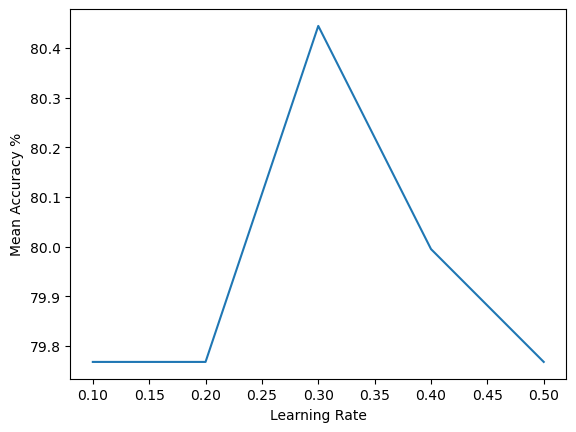

In [42]:
# determining how changing the learning rate changes the AdaBoost model accuracy
mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
    pipe = Pipeline([
        ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('ABC', AdaBoostClassifier(random_state=42, learning_rate=i))
    ])
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=10)
    mean_accuracy.append(scores.mean())

learning_rate_df = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)
print(to_plot)


plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy %')
plt.show()

In [43]:
# building AdaBoost Boosting classifier w/ optimal learning_rate=0.1
AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('ABC', AdaBoostClassifier(random_state=42, learning_rate=0.3))
])
# fit the pipeline
AdaBoost.fit(X_train, y_train)
# cross-validation of model
AdaBoost_cv = cross_val_score(AdaBoost, X_train, y_train)

#### GradientBoost Boosting Classifier

   learning rate  mean accuracy
0            0.1      81.989899
1            0.2      80.424242
2            0.3      79.757576
3            0.4      78.853535
4            0.5      77.727273


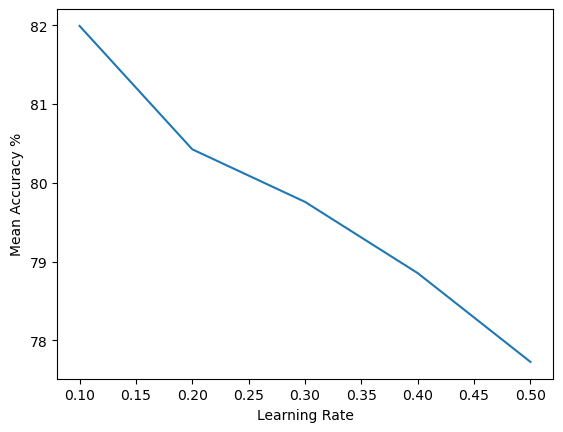

In [44]:
# determining how changing the learning rate changes the GradientBoost model accuracy
mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
    pipe = Pipeline([
        ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('GB', GradientBoostingClassifier(random_state=42, learning_rate=i))
    ])
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=10)
    mean_accuracy.append(scores.mean())

learning_rate_df = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)
print(to_plot)


plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy %')
plt.show()

In [45]:
# building pipeline - gradientboost boosting classifier w/ optimal learning_rate=0.1
GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GB', GradientBoostingClassifier(random_state=42, learning_rate=0.1))
])
# fit the pipeline
GradientBoost.fit(X_train, y_train)
# cross-validation of model
GradientBoost_cv = cross_val_score(GradientBoost, X_train, y_train)

#### Comparing AdaBoost and GradientBoost Feature Importance

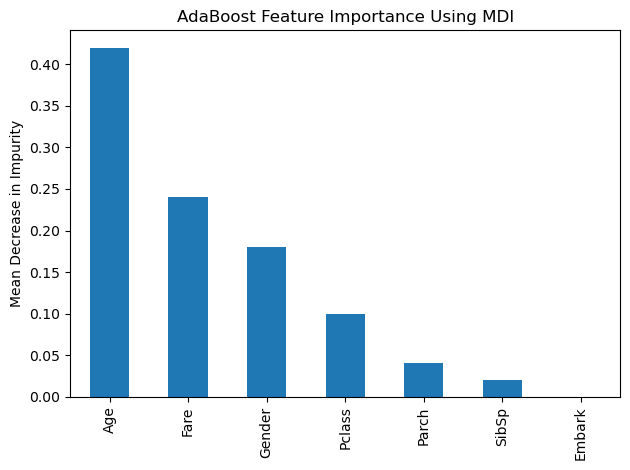

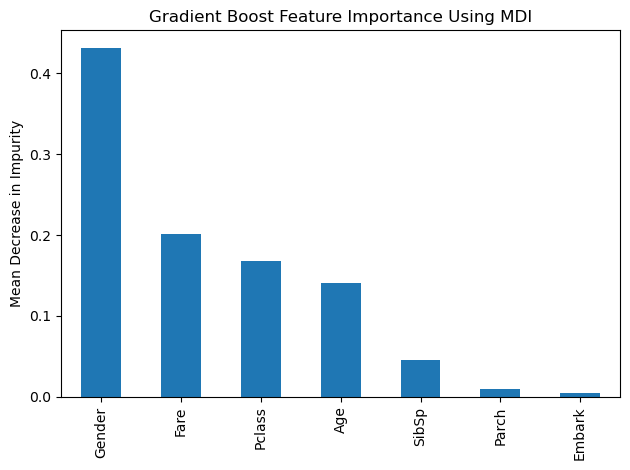

In [46]:
AdaBoost.fit(X_train, y_train)

# calculating feature importance
AB_feature_importances_ = pd.Series(AdaBoost.named_steps['ABC'].feature_importances_, index=X.columns)
AB_feature_importances = AB_feature_importances_.sort_values(ascending=False)

# plotting feature importance
fig, ax = plt.subplots()
AB_feature_importances.plot.bar(ax=ax)
ax.set_title('AdaBoost Feature Importance Using MDI')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout()




GradientBoost.fit(X_train, y_train)

# calculating feature importance
GB_feature_importances_ = pd.Series(GradientBoost.named_steps['GB'].feature_importances_, index=X.columns)
GB_feature_importances = GB_feature_importances_.sort_values(ascending=False)

# plotting feature importance
fig, ax = plt.subplots()
GB_feature_importances.plot.bar(ax=ax)
ax.set_title('Gradient Boost Feature Importance Using MDI')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout()

## Machine Learning Model Evaluation

In [47]:
# list of model names
model_names = ['Logistic Regression', 'Ridge Regression', 'Lasso Regression', 'K-Nearest Neighbors', 'SVM: Polynomial Kernel', 'SVM: Radial Basis Function Kernel', 'NB: Bernoulli Classifier', 'NB: Gaussian Classification', 'Decision Tree Entropy: Entropy', 'Decision Tree: Gini Index', 'Random Forest Classifier', 'AdaBoost Boosting Classifier', 'Gradient Boost Classifier']

# list of model pipelines and steps
model = [logistic_regression, ridge_regression, lasso_regression, knn, poly_svm, rbf_svm, bernoulli, gaussian, entropy_tree, gini_tree, rfc, AdaBoost, GradientBoost]

# list of cross-validation scores
cv_scores = [logistic_regression_cv, ridge_regression_cv, lasso_regression_cv, knn_cv, poly_svm_cv, rbf_svm_cv, bernoulli_cv, gaussian_cv, entropy_tree_cv, gini_tree_cv, rfc_cv, AdaBoost_cv, GradientBoost_cv]

In [48]:
# empty list for appending training accuracy scores
train_accuracy = []

# empty list for appending testing accuracy scores
test_accuracy = []

# calculating training & testing accuracy
for m in model:
    train_acc = m.score(X_train, y_train)
    train_accuracy.append(train_acc)
    test_acc = m.score(X_test, y_test)
    test_accuracy.append(test_acc)

In [49]:
# empty list for appending cross-validation mean scores
cv_mean_scores = []

# empty list for appending cross-validation standard deviation scores
cv_std_scores = []

# calculating cross-validation mean and standard deviation scores
for scores in cv_scores:
    mean = scores.mean()
    cv_mean_scores.append(mean)
    std = scores.std()
    cv_std_scores.append(std)

In [50]:
# creating a dataframe of models and corresponding metrics
ML_models = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Cross-Validation Mean': cv_mean_scores,
    'Cross-Validation Standard Deviation': cv_std_scores
})

ML_models.sort_values(by=['Cross-Validation Mean', 'Test Accuracy', 'Train Accuracy'], ascending=False)

,Model,Train Accuracy,Test Accuracy,Cross-Validation Mean,Cross-Validation Standard Deviation
10,Random Forest Classifier,0.896629,0.807175,0.833708,0.027887
12,Gradient Boost Classifier,0.903371,0.798206,0.829213,0.035102
5,SVM: Radial Basis Function Kernel,0.838202,0.825112,0.824719,0.018256
3,K-Nearest Neighbors,0.831461,0.807175,0.811236,0.016513
4,SVM: Polynomial Kernel,0.831461,0.811659,0.800000,0.019331
11,AdaBoost Boosting Classifier,0.822472,0.789238,0.800000,0.008408
0,Logistic Regression,0.795506,0.802691,0.777528,0.017978
1,Ridge Regression,0.795506,0.802691,0.777528,0.017978
2,Lasso Regression,0.795506,0.802691,0.773034,0.016513
9,Decision Tree: Gini Index,0.982022,0.757848,0.761798,0.036513


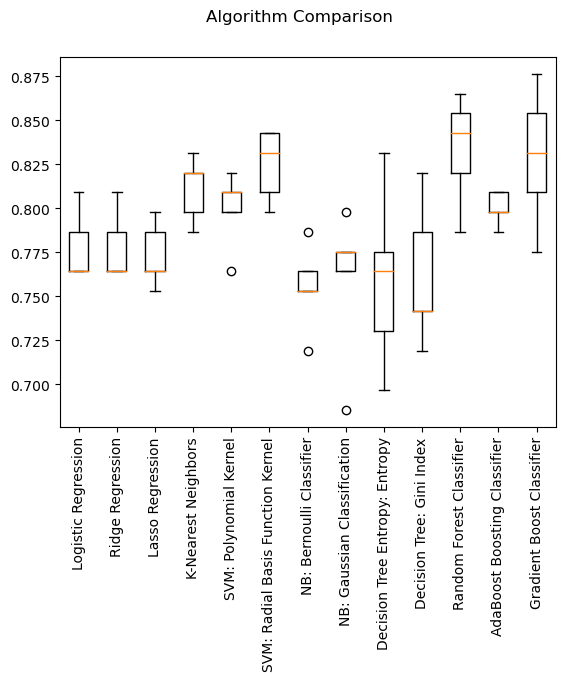

In [51]:
# plotting the model comparisons
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_scores)
ax.set_xticklabels(model_names)
plt.xticks(rotation=90)  # rotating x-axis labels to be vertical
plt.show()

## Conclusion

#### Cross-validaiton of the machine learning models determined that the Random Forest Classifier is the most accurate model with an average cross-validation score of 0.8337